In [6]:
## To import SLAMLOG 
## FIX: (inside framework/tools/python/slamlog.py change "import from utils" to "import from .utils")

import framework.tools.python.slamlog as slamlog

In [18]:
## However you can , list the files : 

import glob
mypath = "./experiments/final/config/"
tum1_lsd_int = glob.glob(mypath + "TUM1XYZ-ISD-INT-*.log")
tum2_lsd_int = glob.glob(mypath + "TUM2XYZ-ISD-INT-*.log")
icl1_orb_int = glob.glob(mypath + "ICL1-ORB-INT-*.log")
icl2_orb_int = glob.glob(mypath + "ICL2-ORB-INT-*.log")
icl3_orb_int = glob.glob(mypath + "ICL3-ORB-INT-*.log")


# icl2_orb_int = glob.glob(mypath + "ICL2-ORB-INT-*.log")
# icl2_orb_dep = glob.glob(mypath + "ICL2-ORB-DEP-*.log")
# icl2_orb_com = glob.glob(mypath + "ICL2-ORB-COM-*.log")


In [19]:
## Then we can load the files (very slow)

data_tum1_lsd_int = slamlog.load_inputs(tum1_lsd_int)
data_tum2_lsd_int = slamlog.load_inputs(tum2_lsd_int)
data_icl1_orb_int = slamlog.load_inputs(icl1_orb_int)
data_icl2_orb_int = slamlog.load_inputs(icl2_orb_int)
data_icl3_orb_int = slamlog.load_inputs(icl3_orb_int)

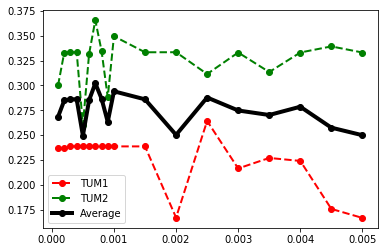

In [20]:
## For example to generate the pareto Accuracy / ExecutionTime

import pandas as pd
import matplotlib.pyplot as plt 
import re
#'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX'], 'FPS':  (1 / x ['Summary']['algo']['Duration_Frame']['MEAN'])

mycleandata1 = [ {'config': float(re.search('TUM1XYZ-ISD-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_lsd_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search('TUM2XYZ-ISD-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_lsd_int.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2']].mean(axis=1)

plt.plot( 'config', 'MaxATE1', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'config', 'MaxATE2', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'config', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.legend()


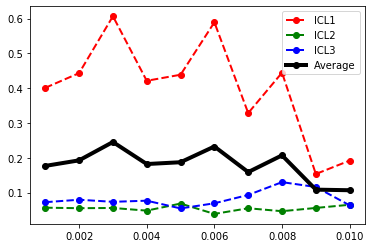

In [22]:
mycleandata1 = [ {'config': float(re.search('ICL1-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl1_orb_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search('ICL2-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_int.items())[:] ]
mycleandata3 = [ {'config': float(re.search('ICL3-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl3_orb_int.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df3 = pd.DataFrame(mycleandata3).sort_values('config')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)

plt.plot( 'config', 'MaxATE1', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="ICL1")
plt.plot( 'config', 'MaxATE2', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="ICL2")
plt.plot( 'config', 'MaxATE3', data=df, marker='o', color='blue', linewidth=2, linestyle='dashed', label="ICL3")
plt.plot( 'config', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.legend()

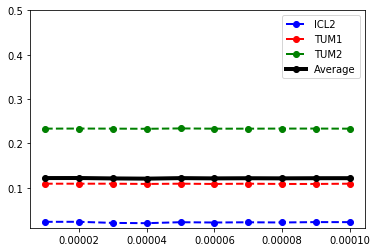

In [7]:
mycleandata1 = [ {'x': float(re.search('ICL2-KF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_kf_com.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-KF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_kf_com.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-KF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_kf_com.items())[:] ]


df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
kfdf['avgcom']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 0.5)
plt.legend()

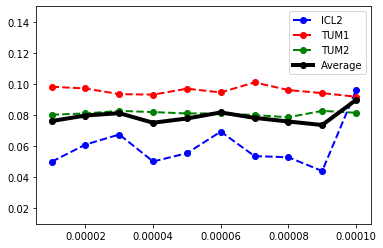

In [26]:
mycleandata1 = [ {'x': float(re.search('ICL2-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_int.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_orb_int.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_orb_int.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
orbdf['avgint']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 0.15)
plt.legend()

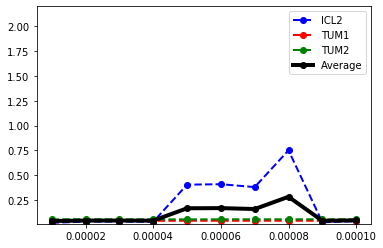

In [27]:
mycleandata1 = [ {'x': float(re.search('ICL2-ORB-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_dep.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-ORB-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_orb_dep.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-ORB-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_orb_dep.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
orbdf['avgdep']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 2.2)
plt.legend()

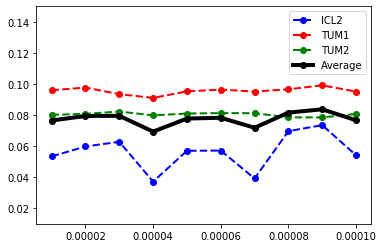

In [10]:
mycleandata1 = [ {'x': float(re.search('ICL2-ORB-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_com.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-ORB-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_orb_com.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-ORB-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_orb_com.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
orbdf['avgcom']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 0.15)
plt.legend()

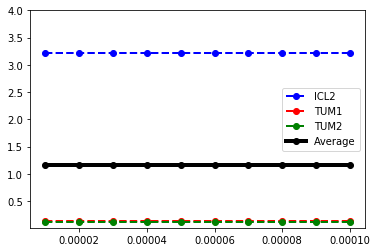

In [11]:
mycleandata1 = [ {'x': float(re.search('ICL2-INF-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_inf_int.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-INF-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_inf_int.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-INF-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_inf_int.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
infdf['avgint']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 4)
plt.legend()

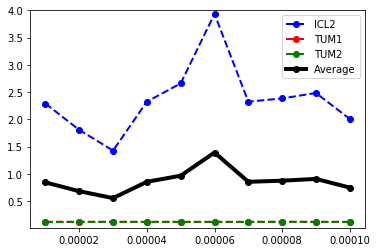

In [12]:
mycleandata1 = [ {'x': float(re.search('ICL2-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_inf_dep.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_inf_dep.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_inf_dep.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
infdf['avgdep']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 4)
plt.legend()

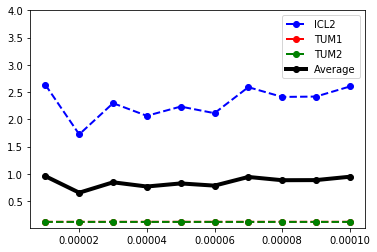

In [13]:
mycleandata1 = [ {'x': float(re.search('ICL2-INF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_inf_com.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-INF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_inf_com.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-INF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_inf_com.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
infdf['avgcom']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 4)
plt.legend()

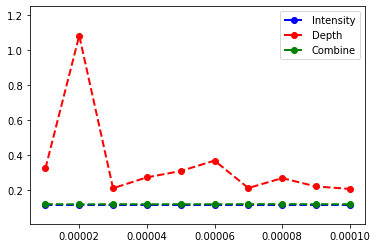

In [17]:
plt.plot( 'config', 'avgint', data=kfdf, marker='o', color='blue', linestyle='dashed', linewidth=2, label="Intensity")
plt.plot( 'config', 'avgdep', data=kfdf, marker='o', color='red', linestyle='dashed', linewidth=2, label="Depth")
plt.plot( 'config', 'avgcom', data=kfdf, marker='o', color='green', linewidth=2, linestyle='dashed', label="Combine")
plt.ylim(0.01, 1.25)
plt.legend()

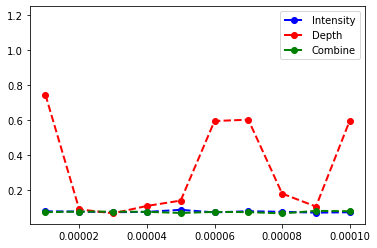

In [18]:
plt.plot( 'config', 'avgint', data=orbdf, marker='o', color='blue', linestyle='dashed', linewidth=2, label="Intensity")
plt.plot( 'config', 'avgdep', data=orbdf, marker='o', color='red', linestyle='dashed', linewidth=2, label="Depth")
plt.plot( 'config', 'avgcom', data=orbdf, marker='o', color='green', linewidth=2, linestyle='dashed', label="Combine")
plt.ylim(0.01, 1.25)
plt.legend()

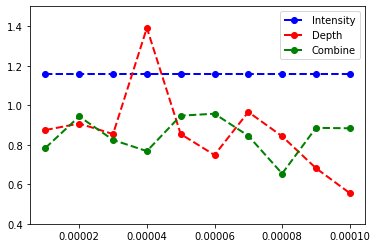

In [20]:
plt.plot( 'config', 'avgint', data=infdf, marker='o', color='blue', linestyle='dashed', linewidth=2, label="Intensity")
plt.plot( 'config', 'avgdep', data=infdf, marker='o', color='red', linestyle='dashed', linewidth=2, label="Depth")
plt.plot( 'config', 'avgcom', data=infdf, marker='o', color='green', linewidth=2, linestyle='dashed', label="Combine")
plt.ylim(0.4, 1.5)
plt.legend()